In [4]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.offsetbox import AnchoredText

## 1 mode injected

In [5]:
result = np.loadtxt('./results/1mode_injected_ALL.dat')
reshaped = np.reshape(result, (len(result)//6, 6))
[snr, nofilter, evidence220, evidence220_221, evidence220_210, evidence220_200] = reshaped.T

Text(0, 0.5, 'lg(BF)')

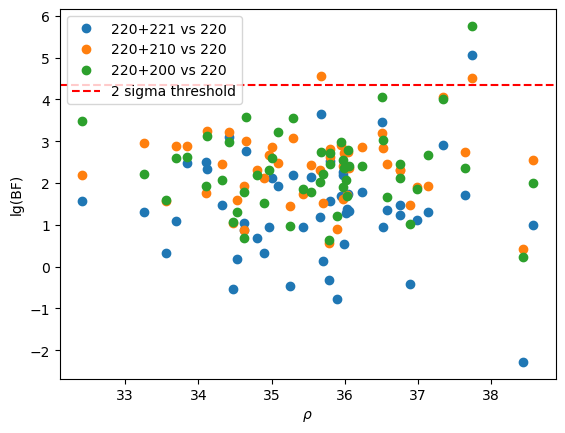

In [6]:
# without normalising for SNR
concat = np.array([evidence220_221-evidence220, evidence220_210-evidence220, evidence220_200-evidence220]).flatten()
threshold = np.median(concat)+2*np.std(concat)

pl.plot(snr, evidence220_221 - evidence220, 'o', label = '220+221 vs 220')
pl.plot(snr, evidence220_210 - evidence220, 'o', label = '220+210 vs 220')
pl.plot(snr, evidence220_200 - evidence220, 'o', label = '220+200 vs 220')
pl.axhline(np.median(concat)+2*np.std(concat), c='r', ls='--', label='2 sigma threshold')
pl.legend()
pl.xlabel(r'$\rho$')
pl.ylabel("lg(BF)")

(array([ 1.,  0.,  0.,  0.,  3.,  2.,  2.,  3.,  6., 11.,  7.,  3.,  6.,
         3.,  2.,  1.,  1.,  0.,  0.,  1.]),
 array([-2.2821107 , -1.91519732, -1.54828394, -1.18137056, -0.81445718,
        -0.4475438 , -0.08063042,  0.28628296,  0.65319634,  1.02010972,
         1.3870231 ,  1.75393649,  2.12084987,  2.48776325,  2.85467663,
         3.22159001,  3.58850339,  3.95541677,  4.32233015,  4.68924353,
         5.05615691]),
 <BarContainer object of 20 artists>)

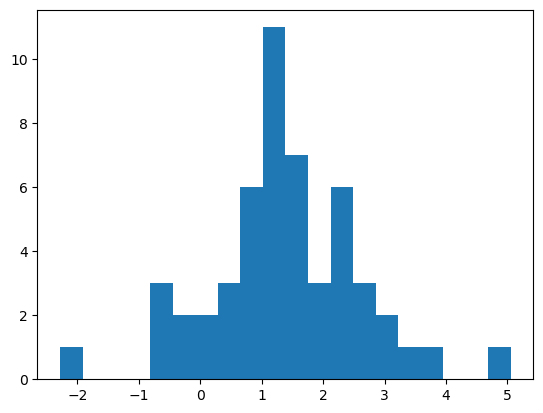

In [7]:
pl.hist(evidence220_221 - evidence220, bins=20)

In [8]:
result = np.loadtxt('./results/2mode_injected_ALL.dat')
reshaped = np.reshape(result, (len(result)//8, 8))
[snr_tot, snr_220, snr_221, nofilter, evidence220_2mode, evidence220_221_2mode, evidence220_210_2mode, evidence220_200_2mode] = reshaped.T

In [20]:
snr_tot

array([48.70743531, 47.48114558, 47.88624222, 50.74925482, 49.60795214,
       49.20985979, 48.22783712, 49.22544118, 51.0203163 , 49.03349867,
       47.73877756, 47.65412063, 50.50406187, 47.88804406, 49.31674287,
       50.60850221, 49.61450797, 47.81573546, 48.70528234, 50.6428446 ,
       48.85451317, 49.6762011 , 49.81187549, 50.5513669 , 46.34532365,
       48.00845832, 49.67502201, 50.79971608, 50.28985062, 48.15012417,
       48.75922584, 48.63483768, 47.43030072, 49.77020562, 49.6331638 ,
       47.34081138, 47.72429672, 48.28516999, 51.09515442, 51.74464341,
       49.66689078, 46.34335504])

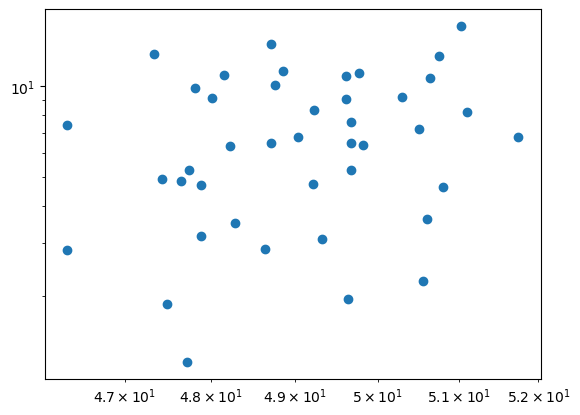

In [18]:
pl.loglog(snr_tot, evidence220_221_2mode - evidence220_2mode, 'o')

In [13]:
np.sqrt(snr_220[0]**2 + snr_221[0]**2)

66.01846021267056

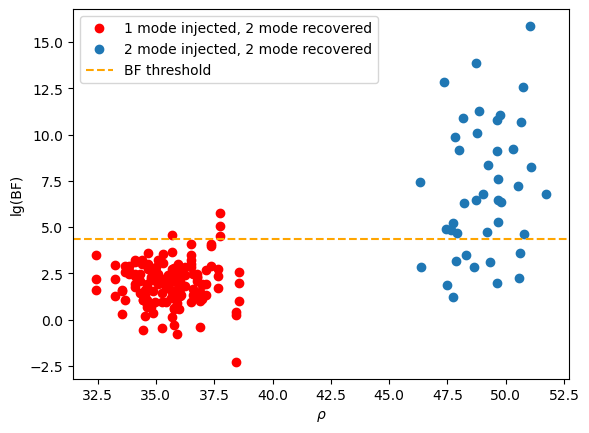

In [10]:
pl.plot(snr, evidence220_221 - evidence220, 'o', c='r', label = '1 mode injected, 2 mode recovered')
pl.plot(snr, evidence220_210 - evidence220, 'o', c='r')
pl.plot(snr, evidence220_200 - evidence220, 'o', c='r')
pl.xlabel(r'$\rho$')
pl.ylabel("lg(BF)")

pl.plot(snr_tot, evidence220_221_2mode - evidence220_2mode, 'o', label = '2 mode injected, 2 mode recovered')
pl.axhline(threshold, c='orange', ls='--', label='BF threshold')
pl.legend()

In [48]:
injected_2modes = evidence220_221_2mode - evidence220_2mode
a =  np.count_nonzero(injected_2modes > threshold)/len(injected_2modes)
b = 1-a
c = np.count_nonzero(concat > threshold)/len(concat)
d = 1-c
MCC = (a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))

[a, b, c, d] = np.round([a, b, c, d], 2)

In [49]:
Latex(f"""\\begin{{equation*}}
\\begin{{bmatrix}}{a} & {b} \\\\{c} & {d}\\end{{bmatrix}}
\\end{{equation*}}
""")

<IPython.core.display.Latex object>

In [50]:
print("Matthews correlation coefficient = %.2f" % MCC)

Matthews correlation coefficient = 0.75


In [51]:
print("Mode is detectable if there exists a BF threshold s.t. the MCC is > 0.75?")
print("For given 2nd mode SNR, 1st mode SNR")

Mode is detectable if there exists a BF threshold s.t. the MCC is > 0.75?
